<a href="https://colab.research.google.com/github/noviantisafitri/Machine-Learning-for-Beginners/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_Novianti_Safitri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Perkenalan Dataset**


Dataset yang digunakan dalam analisis ini diambil dari Kaggle dengan judul "Shop Customer Data." Dataset ini memberikan informasi yang mendetail tentang pelanggan ideal untuk sebuah toko imajiner. Tujuan dari dataset ini adalah untuk membantu pemilik toko lebih memahami karakteristik pelanggan mereka, yang dapat digunakan untuk strategi pemasaran atau segmentasi pelanggan.

Dataset ini terdiri dari 2500 baris, yang cukup besar untuk melakukan analisis yang bermakna dan memastikan bahwa model yang dibangun memiliki cukup data untuk menemukan pola yang relevan. Dataset ini mencakup data kategorikal dan numerikal, yang penting untuk penerapan teknik clustering.

- Kategorikal: Kolom Gender dan Profession adalah data kategorikal. Gender mengidentifikasi jenis kelamin pelanggan (misalnya pria atau wanita), dan Profession menggambarkan pekerjaan atau profesi pelanggan.

- Numerikal: Kolom Age, Annual Income, Spending Score, Work Experience, dan Family Size adalah data numerikal. Ini mencakup data tentang usia, pendapatan tahunan, skor pengeluaran berdasarkan perilaku pelanggan, pengalaman kerja, dan ukuran keluarga yang memberikan informasi yang lebih mendalam tentang kondisi pelanggan.

Dataset terdiri dari 8 kolom yang memberikan informasi terkait pelanggan, antara lain:

- Customer ID – ID unik untuk setiap pelanggan.
- Gender – Jenis kelamin pelanggan (1 untuk pria, 0 untuk wanita).
- Age – Usia pelanggan dalam tahun.
- Annual Income – Pendapatan tahunan pelanggan dalam satuan yang dinormalisasi (0 hingga 1).
- Spending Score – Skor pengeluaran berdasarkan perilaku dan kebiasaan belanja pelanggan, dinilai antara 0 hingga 1.
- Profession – Pekerjaan atau profesi pelanggan.
- Work Experience – Pengalaman kerja pelanggan dalam tahun.
- Family Size – Jumlah anggota keluarga pelanggan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1662]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import VarianceThreshold
from yellowbrick.cluster import KElbowVisualizer
from mpl_toolkits.mplot3d import Axes3D

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [1663]:
df = pd.read_csv('https://raw.githubusercontent.com/noviantisafitri/Machine-Learning-for-Beginners/refs/heads/main/Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [1664]:
# Tinjau jumlah baris dan kolom
print("Jumlah Baris dan Kolom:")
df.shape

Jumlah Baris dan Kolom:


(2500, 8)

Dataset ini terdiri dari 2500 baris dan 8 kolom. Artinya, terdapat 2500 entri data pelanggan dengan 8 fitur atau atribut yang memberikan informasi tentang setiap pelanggan.

In [1665]:
# Tinjau jenis data di setiap kolom
print("\nJenis Data di Setiap Kolom:")
df.dtypes


Jenis Data di Setiap Kolom:


,0
CustomerID,int64
Gender,object
Age,int64
Annual Income ($),int64
Spending Score (1-100),int64
Profession,object
Work Experience,int64
Family Size,int64


Dataset ini terdiri dari 8 kolom dengan berbagai tipe data. Kolom CustomerID, Age, Annual Income ($), Spending Score (1-100), Work Experience, dan Family Size memiliki tipe data numerik (int64), sementara kolom Gender dan Profession berupa data kategorikal (object).

In [1666]:
# Statistik deskriptif
df.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2500.00000,2500.000000,2500.000000,2500.000000,2500.00000,2500.00000
mean,1250.50000,47.973200,98962.050800,51.090800,4.78200,3.73920
std,721.83216,26.394104,48695.212919,28.121986,4.28955,1.92038
min,1.00000,0.000000,0.000000,0.000000,0.00000,1.00000
25%,625.75000,27.000000,62826.750000,28.000000,1.00000,2.00000
50%,1250.50000,47.000000,93370.000000,51.000000,4.00000,4.00000
75%,1875.25000,68.000000,140316.750000,75.000000,8.00000,5.00000
max,2500.00000,99.000000,189974.000000,100.000000,17.00000,9.00000


Hasil statistik deskriptif dari dataset menunjukkan bahwa dataset ini memiliki 2.500 entri untuk setiap kolom. Berikut adalah beberapa temuan kunci:

- Age: Rata-rata usia pelanggan adalah sekitar 47.97 tahun, dengan rentang usia mulai dari 0 hingga 99 tahun.
- Annual Income ($): Pendapatan tahunan rata-rata pelanggan adalah $98,962.05, dengan nilai minimum 0 dan maksimum $189,974.
- Spending Score (1-100): Skor pengeluaran rata-rata adalah 51.09, dengan nilai minimum 0 dan maksimum 100.
- Work Experience: Rata-rata pengalaman kerja pelanggan adalah 4.78 tahun, dengan rentang dari 0 hingga 17 tahun.
- Family Size: Ukuran keluarga rata-rata adalah 3.74, dengan rentang dari 1 hingga 9 anggota keluarga.

In [1667]:
# Cek Missing Values
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income ($),0
Spending Score (1-100),0
Profession,35
Work Experience,0
Family Size,0


Hasil pengecekan missing values menunjukkan bahwa hanya kolom Profession yang memiliki nilai kosong (missing values), dengan jumlah 35 entri yang tidak terisi. Semua kolom lainnya, yaitu CustomerID, Gender, Age, Annual Income ($), Spending Score (1-100), Work Experience, dan Family Size, tidak memiliki nilai kosong.

In [1668]:
# Cek Duplikat
df.duplicated().sum()

0

Hasil pengecekan duplikat menunjukkan bahwa tidak ada baris duplikat dalam dataset, dengan jumlah duplikat sebanyak 0. Ini berarti setiap entri dalam dataset adalah unik.

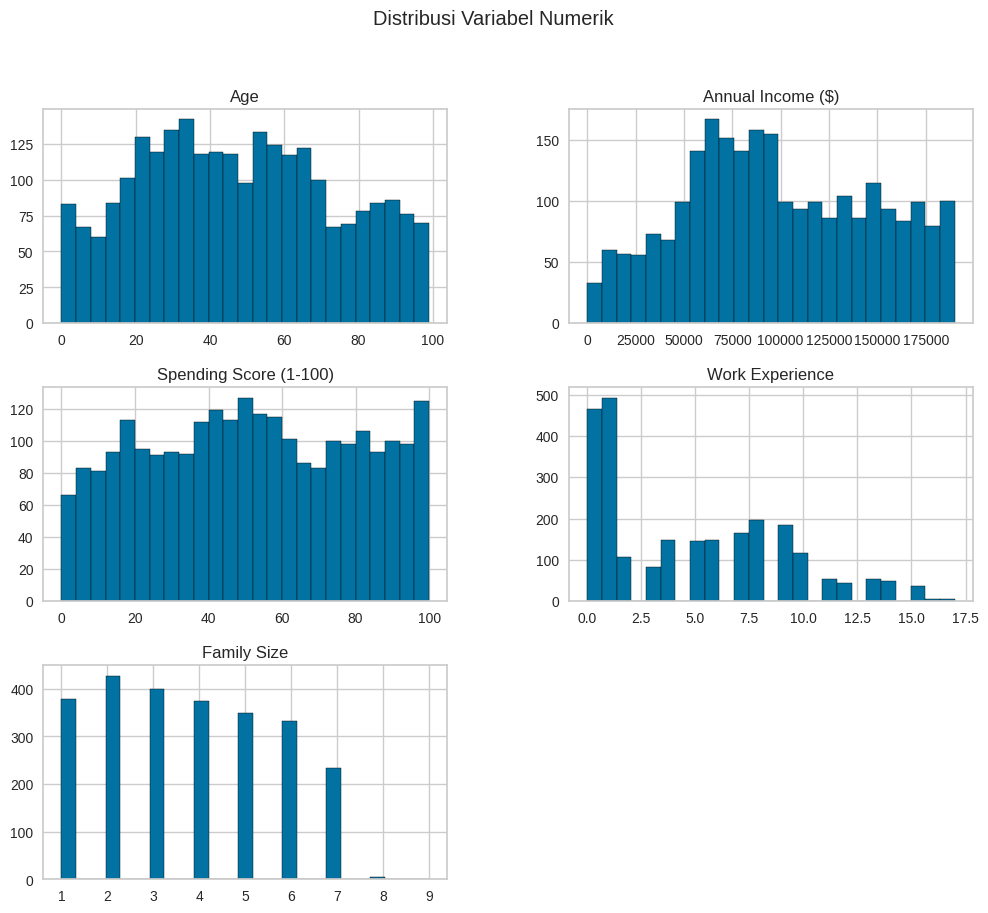

In [1669]:
# Distribusi variabel numerik
numerical_columns = ['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience', 'Family Size']
df[numerical_columns].hist(figsize=(12, 10), bins=25, edgecolor='black')
plt.suptitle('Distribusi Variabel Numerik')
plt.show()

- Umur (Age): Distribusi umur terlihat relatif simetris dengan sedikit condong ke kanan.
- Pendapatan Tahunan (Annual Income): Distribusi pendapatan tahunan juga terlihat relatif simetris dengan sedikit condong ke kanan.
- Skor Pengeluaran (Spending Score): Distribusi skor pengeluaran terlihat sedikit tidak beraturan, tetapi masih dalam rentang yang luas.
- Pengalaman Kerja (Work Experience): Distribusi pengalaman kerja sangat tidak simetris dan didominasi oleh nilai-nilai rendah.
- Ukuran Keluarga (Family Size): Distribusi ukuran keluarga didominasi oleh ukuran 1 hingga 5, dengan penurunan bertahap setelahnya.

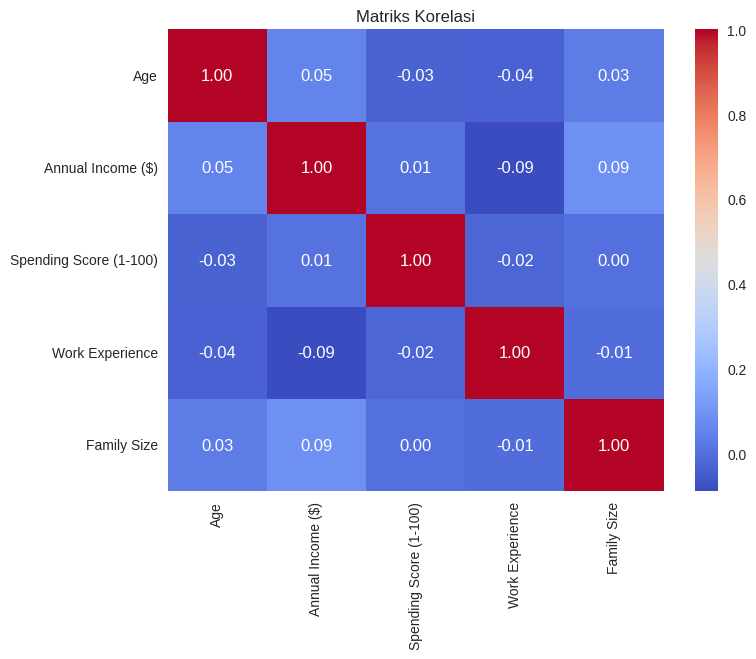

In [1670]:
# Matriks Korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriks Korelasi")
plt.show()

- Korelasi Positif Terkuat: Setiap variabel memiliki korelasi sempurna dengan dirinya sendiri, seperti "Age" dengan "Age", "Annual Income" dengan "Annual Income", dan seterusnya.
- Korelasi Lemah Antara Variabel: Tidak ada korelasi yang sangat kuat antara variabel-variabel berbeda, menunjukkan hubungan linear yang lemah antar variabel.
- Korelasi Negatif Terlemah: "Work Experience" dan "Annual Income" memiliki korelasi negatif sangat lemah (-0.09), yang tidak signifikan.
- Korelasi Positif Terlemah: "Spending Score" dan "Family Size" memiliki korelasi positif sangat lemah (0.00), yang menunjukkan tidak ada hubungan linear.

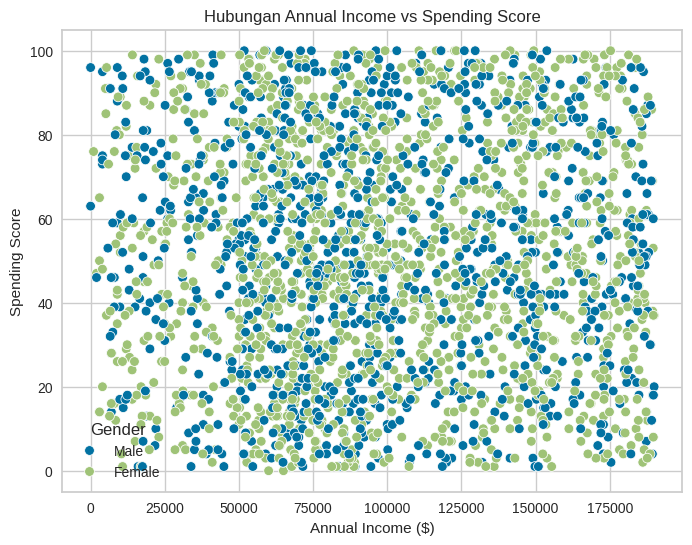

In [1671]:
# Scatter Plot untuk hubungan antara 'Annual Income' dan 'Spending Score'
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Annual Income ($)'], y=df['Spending Score (1-100)'], hue=df['Gender'])
plt.title("Hubungan Annual Income vs Spending Score")
plt.xlabel("Annual Income ($)")
plt.ylabel("Spending Score")
plt.legend(title="Gender")
plt.show()

- Pelanggan wanita cenderung memiliki skor pengeluaran lebih tinggi daripada pria, terutama di pendapatan menengah ke atas.
- Tidak ada pola garis lurus jelas antara pendapatan tahunan dan skor pengeluaran; data tersebar acak.
- Ada beberapa kelompok pelanggan berdasarkan pendapatan dan skor pengeluaran, termasuk yang memiliki pendapatan tinggi dengan skor pengeluaran rendah atau sebaliknya.

<ipython-input-1672-6c5ed6c8cc50>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='coolwarm')


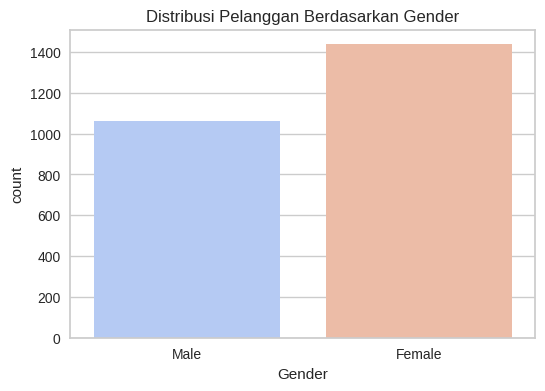

In [1672]:
# Analisis Distribusi Pelanggan Berdasarkan Gender
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df, palette='coolwarm')
plt.title("Distribusi Pelanggan Berdasarkan Gender")
plt.show()

Berdasarkan visualisasi diatas, distribusi pelanggan berdasarkan gender didominasi oleh wanita

<ipython-input-1673-377bdef1f05a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Profession', data=df, palette='viridis', order=df['Profession'].value_counts().index)


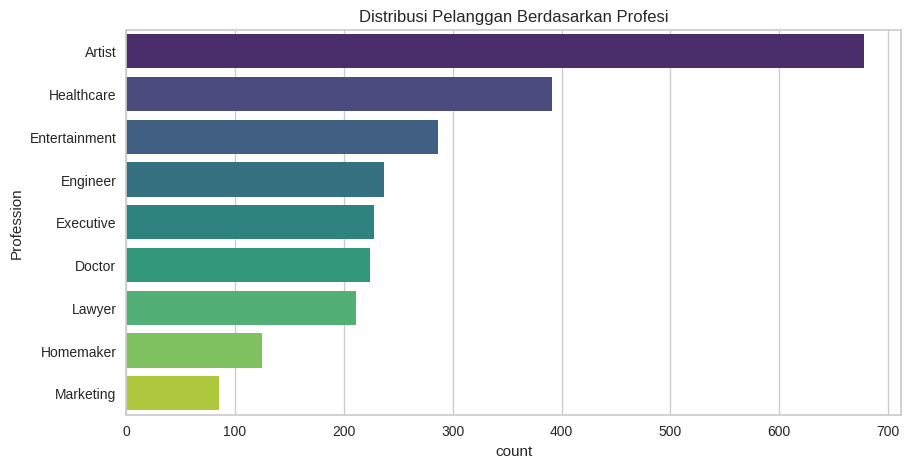

In [1673]:
# Analisis Distribusi Pelanggan Berdasarkan Profesi
plt.figure(figsize=(10, 5))
sns.countplot(y='Profession', data=df, palette='viridis', order=df['Profession'].value_counts().index)
plt.title("Distribusi Pelanggan Berdasarkan Profesi")
plt.show()

Berdasarkan visualisasi diatas, distribusi pelanggan berdasarkan profesi didominasi oleh Artist

<ipython-input-1674-133ca339a8b4>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Profession', y='Annual Income ($)', palette='viridis', ci=None)
<ipython-input-1674-133ca339a8b4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Profession', y='Annual Income ($)', palette='viridis', ci=None)


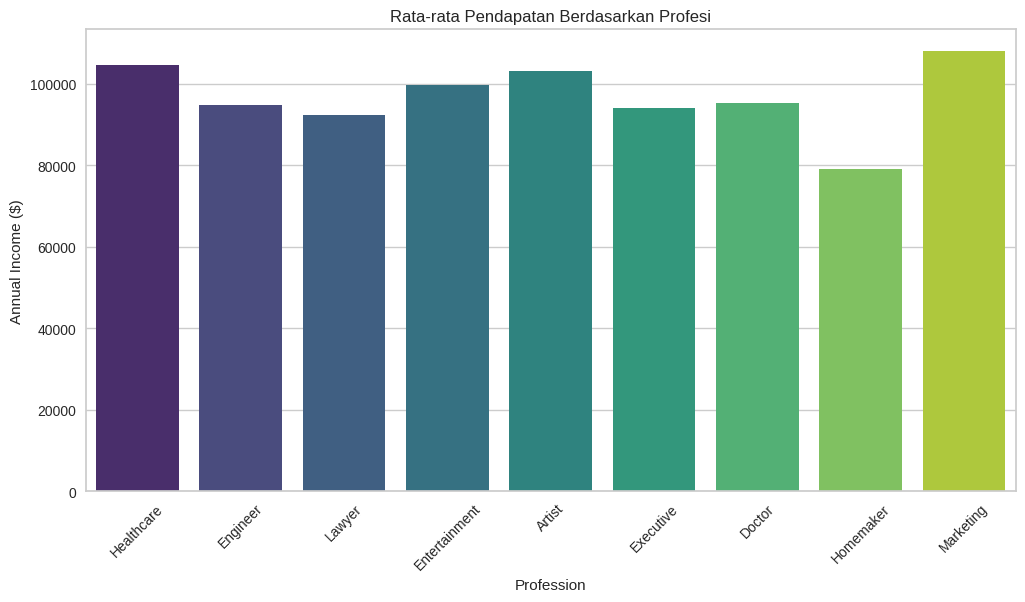

In [1674]:
# Analisis rata-rata pendapatan berdasarkan pekerjaan
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Profession', y='Annual Income ($)', palette='viridis', ci=None)
plt.xticks(rotation=45)
plt.title('Rata-rata Pendapatan Berdasarkan Profesi')
plt.show()

Berdasarkan visualisasi diatas, terlihat bahwa pendapatan tertinggi adalah profesi marketing, healthcare, dan artist.

<ipython-input-1675-d3dc9d34b684>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Family Size', y='Spending Score (1-100)', palette='coolwarm')


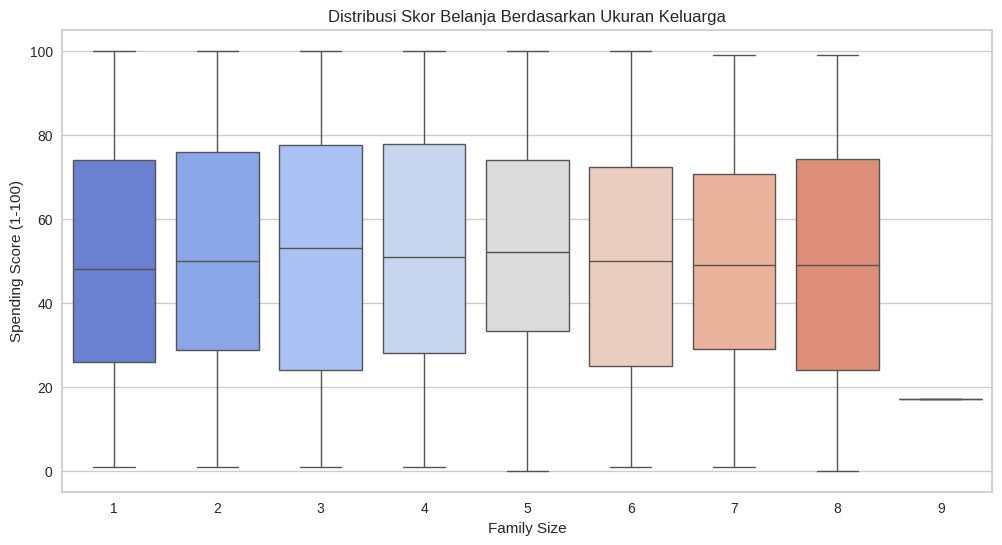

In [1675]:
# Analisis pengaruh ukuran keluarga terhadap skor belanja
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Family Size', y='Spending Score (1-100)', palette='coolwarm')
plt.title('Distribusi Skor Belanja Berdasarkan Ukuran Keluarga')
plt.show()

- Ukuran keluarga mempengaruhi variasi skor belanja. Keluarga dengan ukuran lebih kecil (1 dan 5) menunjukkan variasi yang lebih besar, termasuk pencilan signifikan.
- Ukuran keluarga 2, 3, dan 4 memiliki skor belanja yang lebih terpusat di sekitar median, dengan variasi yang lebih kecil.
- Ukuran keluarga yang lebih besar (6-9) cenderung menunjukkan tren peningkatan skor belanja, meskipun dengan variasi yang berbeda-beda.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [1676]:
# Menghapus baris dengan nilai kosong
df = df.dropna()
# Menampilkan jumlah nilai kosong setelah di-drop
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income ($),0
Spending Score (1-100),0
Profession,0
Work Experience,0
Family Size,0


Setelah menghapus baris dengan nilai kosong menggunakan dropna(), tidak ada lagi nilai kosong pada dataset. Semua kolom sekarang memiliki data lengkap tanpa missing values.

In [1677]:
# Menggunakan Z-Score untuk mendeteksi outlier
from scipy import stats
z_scores = stats.zscore(df[['Age', 'Annual Income ($)', 'Spending Score (1-100)']])
df = df[(z_scores < 3).all(axis=1)]  # Menghapus outlier berdasarkan Z-Score

In [1678]:
label_encoder = LabelEncoder()

# Encode kolom 'Gender'
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [1679]:
# Normalisasi menggunakan MinMaxScaler
scaler = MinMaxScaler()
df[['Annual Income ($)', 'Spending Score (1-100)']] = scaler.fit_transform(df[['Annual Income ($)', 'Spending Score (1-100)']])

In [1680]:
# Binning untuk usia menjadi kategori (misalnya, 'Young', 'Middle-aged', 'Senior')
bins = [0, 25, 40, 60, np.inf]
labels = ['Young', 'Middle-aged', 'Senior', 'Elder']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

In [1681]:
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,Age_Group
0,1,1,19,0.078958,0.39,Healthcare,1,4,Young
1,2,1,21,0.184236,0.81,Engineer,3,3,Young
2,3,0,20,0.452694,0.06,Engineer,1,1,Young
3,4,0,23,0.310569,0.77,Lawyer,0,2,Young
4,5,0,31,0.200027,0.40,Entertainment,2,6,Middle-aged


Dengan menggunakan teknik binning, usia pelanggan diubah menjadi kategori yang lebih mudah dianalisis, yaitu 'Young' (0-25 tahun), 'Middle-aged' (26-40 tahun), 'Senior' (41-60 tahun), dan 'Elder' (60 tahun ke atas). Kolom baru ini, yang dinamakan 'Age_Group', menggambarkan kelompok usia masing-masing pelanggan berdasarkan batas yang telah ditentukan.

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [1682]:
# Menyiapkan data clustering
clustering_data = df[['Annual Income ($)', 'Spending Score (1-100)', 'Gender']].values

# Inisialisasi list untuk menyimpan nilai inertia dan silhouette score
inertias, silhouette_scores = [], []

# Melakukan clustering untuk jumlah cluster dari 2 hingga 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clustering_data)
    labels = kmeans.labels_

    # Menyimpan inertia dan silhouette score
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(clustering_data, labels))

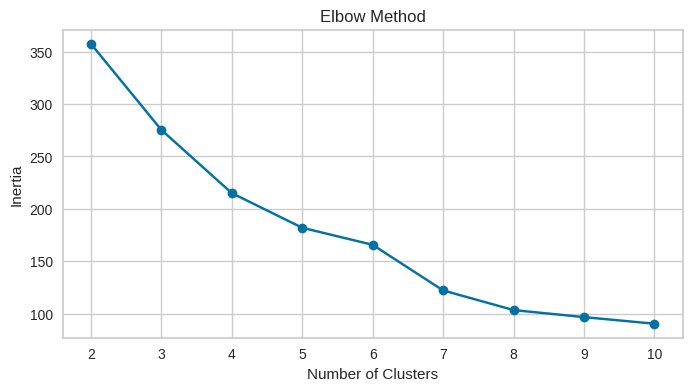

In [1683]:
# Visualisasi Elbow Method
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

Dari visualisasiElbow method terlihat bahwa pilihan cluster adalah 3.

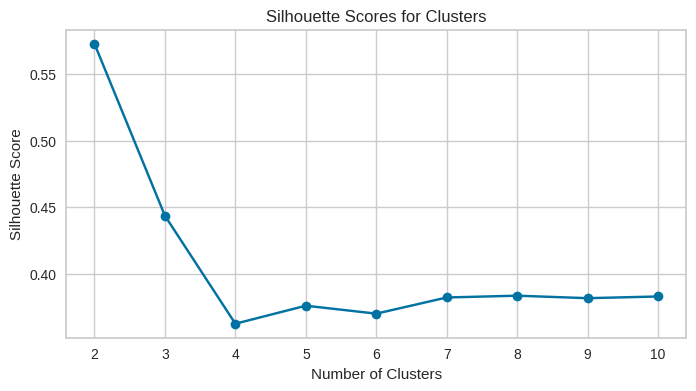

In [1684]:
# Visualisasi Silhouette Scores
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

Dari visualisasi 'Silhouette Score For Optimal k terlihat bahwa pilihan cluster adalah 3.

In [1685]:
# Melakukan clustering DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)  # Sesuaikan parameter eps dan min_samples
dbscan_labels = dbscan.fit_predict(df[['Annual Income ($)', 'Spending Score (1-100)', 'Gender']])

# Evaluasi Silhouette Score untuk DBSCAN
if len(set(dbscan_labels)) > 1:  # DBSCAN mungkin memberi label -1 untuk noise
    dbscan_sil_score = silhouette_score(df[['Annual Income ($)', 'Spending Score (1-100)', 'Gender']], dbscan_labels)
    print(f'Silhouette Score DBSCAN: {dbscan_sil_score}')
else:
    print("DBSCAN menghasilkan hanya satu cluster atau noise, silhouette score tidak dapat dihitung.")

Silhouette Score DBSCAN: 0.572953625648127


In [1686]:
# Reduksi dimensi dengan PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[['Annual Income ($)', 'Spending Score (1-100)', 'Gender']])

# KMeans dengan PCA
kmeans_pca = KMeans(n_clusters=3, random_state=42)  # Tentukan jumlah cluster optimal yang sesuai
kmeans_pca.fit(pca_result)
pca_labels = kmeans_pca.labels_

# Evaluasi Silhouette Score untuk KMeans dengan PCA
pca_sil_score = silhouette_score(pca_result, pca_labels)
print(f'Silhouette Score KMeans dengan PCA: {pca_sil_score}')

Silhouette Score KMeans dengan PCA: 0.6375627533238624


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [1687]:
# Fungsi untuk menghitung inertia dan silhouette score
def calculate_scores(data, n_clusters_range):
    inertia, silhouette_scores = [], []
    for n_clusters in n_clusters_range:
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        kmeans.fit(data)
        labels = kmeans.labels_
        inertia.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(data, labels))
    return inertia, silhouette_scores

# Tentukan range jumlah cluster yang akan diuji
range_n_clusters = range(2, 11)

# Hitung inertia dan silhouette score
inertia, silhouette_scores = calculate_scores(df_pca, range_n_clusters)

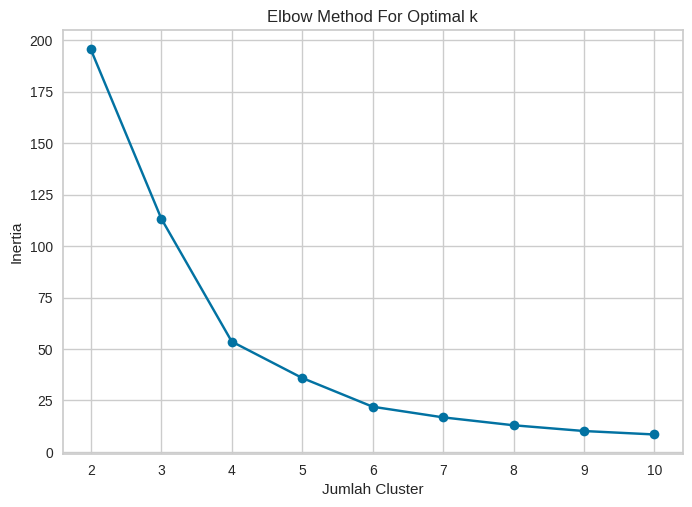

In [1688]:
# Visualisasi Elbow Curve
plt.plot(range_n_clusters, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.show()

Metode Elbow membantu kita menemukan jumlah cluster yang menyeimbangkan antara inersia yang rendah dan kompleksitas model yang tidak perlu. Dari visualisasi ini terlihat bahwa pilihan cluster adalah 3.

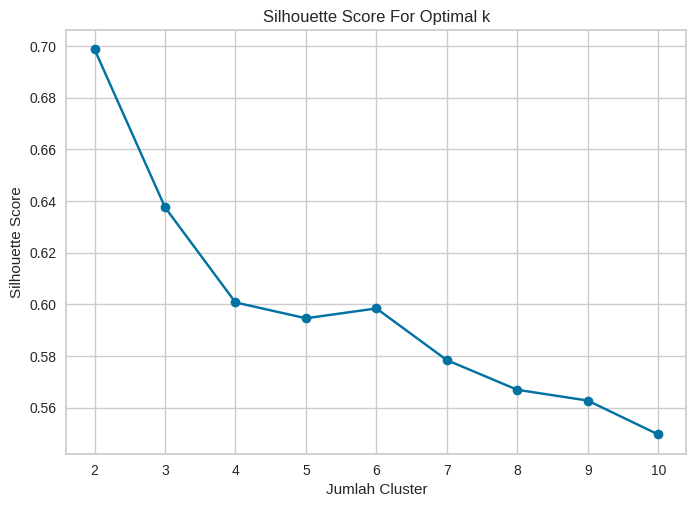

In [1689]:
# Visualisasi Silhouette Score
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Score For Optimal k')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.show()

Dari visualisasi 'Silhouette Score For Optimal k terlihat bahwa pilihan cluster adalah 3.

In [1690]:
# Tampilkan hasil Silhouette Score untuk setiap jumlah cluster
for n_clusters, score in zip(range_n_clusters, silhouette_scores):
    print(f"Jumlah Cluster: {n_clusters}, Silhouette Score: {score}")

Jumlah Cluster: 2, Silhouette Score: 0.6986294663887037
Jumlah Cluster: 3, Silhouette Score: 0.6375627533238624
Jumlah Cluster: 4, Silhouette Score: 0.6007705806071919
Jumlah Cluster: 5, Silhouette Score: 0.5946520930731622
Jumlah Cluster: 6, Silhouette Score: 0.5984556275971751
Jumlah Cluster: 7, Silhouette Score: 0.5784590400001547
Jumlah Cluster: 8, Silhouette Score: 0.5669796507545348
Jumlah Cluster: 9, Silhouette Score: 0.5628109815100147
Jumlah Cluster: 10, Silhouette Score: 0.5496980235451276


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [1691]:
# Seleksi fitur dengan Variance Threshold
df_selected = VarianceThreshold(threshold=0.1).fit_transform(df[['Annual Income ($)', 'Spending Score (1-100)', 'Gender']])

# KMeans clustering dan evaluasi silhouette score
labels = KMeans(n_clusters=2, random_state=42).fit_predict(df_selected)
sil_score_selected = silhouette_score(df_selected, labels)

# Tampilkan hasil evaluasi dan perbandingan
print(f'Silhouette Score setelah Feature Selection: {sil_score_selected}')
print(f'Perbandingan: {sil_score_selected} (setelah) vs  0.6375627533238624 (sebelum)')

Silhouette Score setelah Feature Selection: 1.0
Perbandingan: 1.0 (setelah) vs  0.6375627533238624 (sebelum)


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

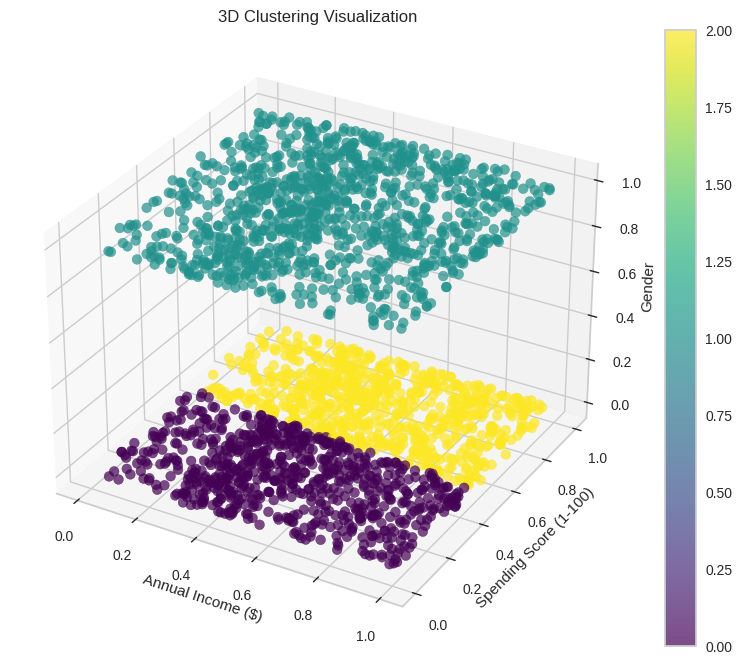

In [1692]:
# Visualisasi 3D jika df memiliki lebih dari dua fitur
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot data dengan warna berdasarkan label cluster
scatter = ax.scatter(
    df['Annual Income ($)'],
    df['Spending Score (1-100)'],
    df['Gender'],
    c=labels_pca,
    cmap='viridis',
    s=50,
    alpha=0.7
)

# Tambahkan color bar untuk menunjukkan cluster
fig.colorbar(scatter)

# Set label untuk setiap axis
ax.set_xlabel('Annual Income ($)')
ax.set_ylabel('Spending Score (1-100)')
ax.set_zlabel('Gender')

# Tambahkan judul plot
plt.title('3D Clustering Visualization')
plt.show()

Visualisasi diatas mengelompokkan pelanggan berdasarkan tiga dimensi: pendapatan tahunan, skor pengeluaran, dan gender. Terlihat tiga kluster utama yang berbeda, masing-masing dengan karakteristik yang berbeda. Warna pada titik-titik data menunjukkan perbedaan gender, dengan beberapa kluster didominasi oleh satu jenis kelamin. Kluster-kluster ini dapat diinterpretasikan sebagai kelompok pelanggan yang berbeda dengan preferensi dan perilaku belanja yang berbeda.

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [1693]:
# Tambahkan Hasil Label Cluster ke DataFrame
df['Cluster'] = labels_pca  # Menambahkan hasil clustering ke dataframe

# Ubah label cluster agar dimulai dari 1
df['Cluster'] = df['Cluster'] + 1

In [1694]:
# Inverse transform untuk kolom yang sudah dinormalisasi dan label encoding (jika ada)
# Contoh: Kolom Gender yang telah di-label encoding

label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])  # Proses encoding
# Sekarang lakukan inverse transform pada kolom Gender
df['Gender'] = label_encoder.inverse_transform(df['Gender'])

In [1695]:
# Jika sebelumnya data sudah dinormalisasi dengan MinMaxScaler, lakukan inverse transform
scaler = MinMaxScaler()
df[['Annual Income ($)', 'Spending Score (1-100)']] = scaler.fit_transform(df[['Annual Income ($)', 'Spending Score (1-100)']])

# Lakukan inverse transform pada data yang telah dinormalisasi
df[['Annual Income ($)', 'Spending Score (1-100)']] = scaler.inverse_transform(df[['Annual Income ($)', 'Spending Score (1-100)']])

In [1696]:
# Cek data yang sudah di-inverse transform
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,Age_Group,Cluster
0,1,1,19,0.078958,0.39,Healthcare,1,4,Young,2
1,2,1,21,0.184236,0.81,Engineer,3,3,Young,2
2,3,0,20,0.452694,0.06,Engineer,1,1,Young,1
3,4,0,23,0.310569,0.77,Lawyer,0,2,Young,3
4,5,0,31,0.200027,0.40,Entertainment,2,6,Middle-aged,1


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [1697]:
scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(df[['Annual Income ($)', 'Spending Score (1-100)', 'Gender']])

# Inverse transform untuk mengembalikan data ke skala asli
df[['Annual Income ($)', 'Spending Score (1-100)', 'Gender']] = scaler.inverse_transform(df_normalized)

# Tampilkan hasilnya
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,Age_Group,Cluster
0,1,1.0,19,0.078958,0.39,Healthcare,1,4,Young,2
1,2,1.0,21,0.184236,0.81,Engineer,3,3,Young,2
2,3,0.0,20,0.452694,0.06,Engineer,1,1,Young,1
3,4,0.0,23,0.310569,0.77,Lawyer,0,2,Young,3
4,5,0.0,31,0.200027,0.40,Entertainment,2,6,Middle-aged,1


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [1698]:
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,Age_Group,Cluster
0,1,1.0,19,0.078958,0.39,Healthcare,1,4,Young,2
1,2,1.0,21,0.184236,0.81,Engineer,3,3,Young,2
2,3,0.0,20,0.452694,0.06,Engineer,1,1,Young,1
3,4,0.0,23,0.310569,0.77,Lawyer,0,2,Young,3
4,5,0.0,31,0.200027,0.40,Entertainment,2,6,Middle-aged,1


In [1699]:
# Menganalisis karakteristik cluster
cluster_analysis = df.groupby('Cluster').agg(
    {
        'Annual Income ($)': ['mean', 'std', 'min', 'max'],
        'Spending Score (1-100)': ['mean', 'std', 'min', 'max'],
        'Gender': ['mean', 'std', 'min', 'max']
    }
)

print(cluster_analysis)

        Annual Income ($)                                \
                     mean       std       min       max   
Cluster                                                   
1                0.511372  0.258921  0.010528  1.000000   
2                0.510904  0.255848  0.000000  0.999847   
3                0.541199  0.254695  0.005264  0.998189   

        Spending Score (1-100)                       Gender                 
                          mean       std   min   max   mean  std  min  max  
Cluster                                                                     
1                     0.273467  0.146131  0.00  0.54    0.0  0.0  0.0  0.0  
2                     0.516231  0.281721  0.01  1.00    1.0  0.0  1.0  1.0  
3                     0.754286  0.146897  0.49  1.00    0.0  0.0  0.0  0.0  


<ipython-input-1700-1f68c930dca4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Annual Income ($)', data=df, palette='viridis')


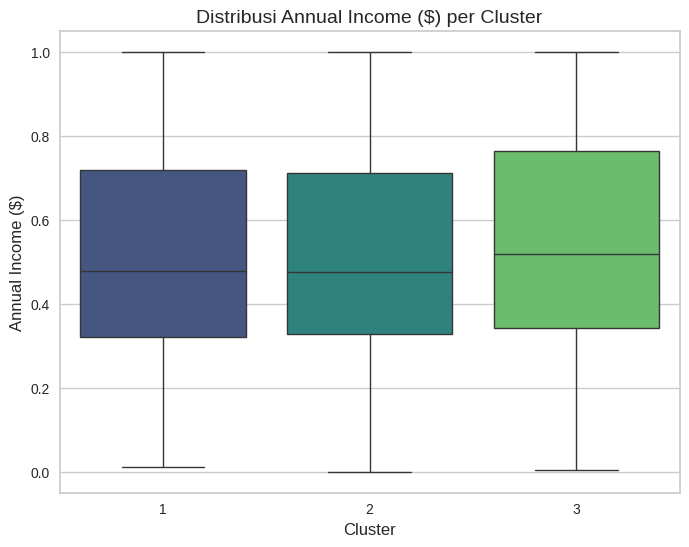

In [1700]:
# Visualisasi distribusi Annual Income ($) untuk setiap cluster
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster', y='Annual Income ($)', data=df, palette='viridis')
plt.title('Distribusi Annual Income ($) per Cluster', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Annual Income ($)', fontsize=12)
plt.xticks(rotation=0)
plt.show()

Cluster 1 menunjukkan median pendapatan yang relatif rendah dan variasi yang kecil, dengan beberapa pencilan di sisi atas. Cluster 2 memiliki median pendapatan yang lebih tinggi daripada cluster 1 dan variasi yang lebih besar, juga dengan beberapa pencilan di sisi atas. Cluster 3 menunjukkan median pendapatan tertinggi dan variasi yang paling besar, dengan banyak pencilan di kedua sisi.

<ipython-input-1701-b3c4e7bee7f4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Spending Score (1-100)', data=df, palette='viridis')


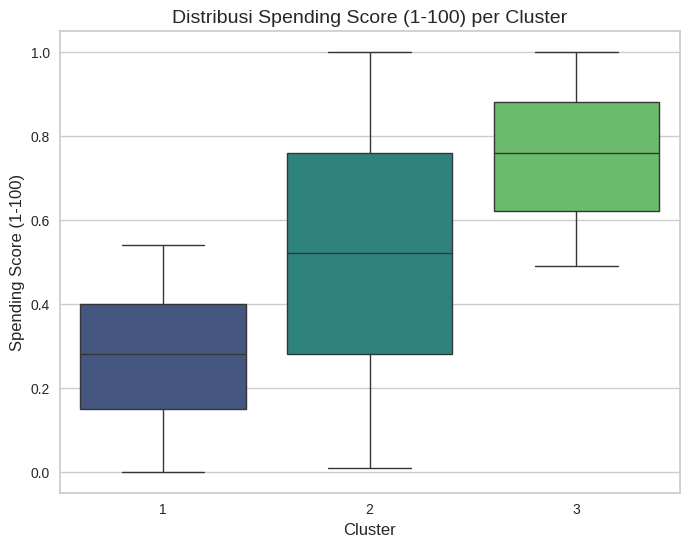

In [1701]:
# Visualisasi distribusi Spending Score (1-100) untuk setiap cluster
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster', y='Spending Score (1-100)', data=df, palette='viridis')
plt.title('Distribusi Spending Score (1-100) per Cluster', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.xticks(rotation=0)
plt.show()

Terlihat bahwa cluster 3 memiliki median skor belanja tertinggi dan rentang interkuartil yang juga paling luas, menunjukkan variasi skor belanja yang signifikan dalam kelompok ini. Cluster 2 menunjukkan median skor belanja yang lebih rendah dari cluster 3 namun masih lebih tinggi dari cluster 1, dengan rentang interkuartil yang cukup besar. Sementara itu, cluster 1 memiliki median skor belanja terendah dan variasi yang paling kecil dibandingkan kedua cluster lainnya. Secara keseluruhan, visualisasi ini mengindikasikan adanya perbedaan karakteristik belanja yang mencolok antar cluster, di mana cluster 3 cenderung memiliki skor belanja tertinggi dan cluster 1 memiliki skor belanja terendah.

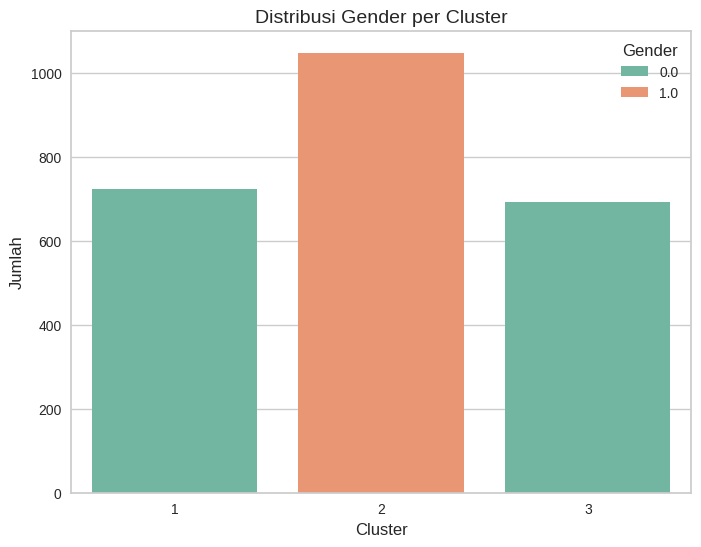

In [1702]:
# Visualisasi distribusi Gender per cluster
plt.figure(figsize=(8, 6))
sns.countplot(x='Cluster', hue='Gender', data=df, palette='Set2')
plt.title('Distribusi Gender per Cluster', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Gender', fontsize=10)
plt.show()

Visualisasi ini menggambarkan distribusi gender pada tiga cluster yang berbeda. Terlihat bahwa cluster 2 didominasi oleh laki-laki, sementara cluster 1 dan 3 didominasi oleh wanita.

# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 0.511372
- **Rata-rata Spending Score (1-100):** 0.273467
- **Gender:** Wanita
- **Analisis:** Cluster ini didominasi oleh wanita dengan penghasilan tahunan yang cukup tinggi, namun memiliki tingkat pengeluaran yang rendah. Meskipun penghasilannya cenderung lebih tinggi, kelompok ini lebih selektif dalam pengeluaran. Hal ini menunjukkan bahwa mereka lebih cenderung untuk menabung atau mengalokasikan pengeluaran untuk kebutuhan penting. Oleh karena itu, produk yang lebih praktis atau yang menawarkan nilai lebih dapat menjadi pilihan yang tepat untuk kelompok ini, meskipun mereka juga mungkin tertarik pada barang-barang premium dengan harga yang bersaing.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 0.510904
- **Rata-rata Spending Score (1-100):** 0.516231
- **Gender:** Pria
- **Analisis:** Cluster ini mayoritas diisi oleh pria dengan penghasilan tahunan yang tergolong menengah dan pola pengeluaran yang moderat. Mereka tidak tergolong dalam kategori konsumtif tinggi atau rendah, namun lebih memilih pengeluaran yang seimbang. Dengan demikian, produk-produk yang berfokus pada fungsionalitas dan inovasi akan lebih menarik untuk mereka. Produk seperti perangkat teknologi terbaru, gadget, atau alat praktis yang meningkatkan produktivitas bisa menjadi pilihan yang sangat relevan untuk kelompok ini.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 0.541199
- **Rata-rata Spending Score (1-100):** 0.754286
- **Gender:** Wanita
- **Analisis:** Cluster ini lebih didominasi oleh wanita dengan penghasilan yang lebih rendah, namun mereka cenderung memiliki pengeluaran yang cukup tinggi. Hal ini menunjukkan bahwa mereka mungkin lebih fokus pada kebutuhan segera atau memiliki gaya hidup yang lebih konsumtif. Produk-produk yang terjangkau namun tetap memberikan nilai praktis dan fungsional akan lebih sesuai dengan kebutuhan mereka. Di antara produk yang cocok adalah barang-barang dengan harga terjangkau namun memiliki kualitas yang baik serta memenuhi kebutuhan sehari-hari mereka.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [1703]:
# Mengekspor df yang telah diperbarui ke dalam file CSV
df.to_csv('Clustering.csv', index=False)